In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
y.shape

(9568,)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
y_test.shape

(1914,)

In [7]:
ann = tf.keras.models.Sequential()

In [8]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [10]:
ann.add(tf.keras.layers.Dense(units=1,activation=None))

In [11]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
X_train

array([[  11.22,   43.13, 1017.24,   80.9 ],
       [  13.67,   54.3 , 1015.92,   75.42],
       [  32.84,   77.95, 1014.68,   45.8 ],
       ...,
       [  16.81,   38.52, 1018.26,   75.21],
       [  12.8 ,   41.16, 1022.43,   86.19],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [13]:
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=100)

Epoch 1/100
240/240 [==============================] - 0s 1ms/step - loss: 206574.0625
Epoch 2/100
240/240 [==============================] - 0s 977us/step - loss: 206356.0625
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 206138.4375
Epoch 4/100
240/240 [==============================] - 0s 972us/step - loss: 205920.8594
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 205703.4531
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 205486.1719
Epoch 7/100
240/240 [==============================] - 0s 977us/step - loss: 205269.0312
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 205052.0156
Epoch 9/100
240/240 [==============================] - 0s 931us/step - loss: 204835.2812
Epoch 10/100
240/240 [==============================] - 0s 948us/step - loss: 204618.5625
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 204401.9375
Epoch 12/100
240/240 [=========

240/240 [==============================] - 0s 1ms/step - loss: 187251.7812
Epoch 93/100
240/240 [==============================] - 1s 2ms/step - loss: 187044.8125
Epoch 94/100
240/240 [==============================] - 0s 2ms/step - loss: 186837.9688
Epoch 95/100
240/240 [==============================] - 0s 2ms/step - loss: 186631.0781
Epoch 96/100
240/240 [==============================] - 0s 2ms/step - loss: 186424.4688
Epoch 97/100
240/240 [==============================] - 0s 1ms/step - loss: 186217.8594
Epoch 98/100
240/240 [==============================] - 0s 1ms/step - loss: 186011.4375
Epoch 99/100
240/240 [==============================] - 0s 997us/step - loss: 185805.1406
Epoch 100/100
240/240 [==============================] - 0s 1ms/step - loss: 185599.0312


In [14]:
y_pred = ann.predict(X_test)

In [15]:
y_pred

array([[23.94957],
       [23.94957],
       [23.94957],
       ...,
       [23.94957],
       [23.94957],
       [23.94957]], dtype=float32)

In [37]:
y_test

array([   0.68,    0.41,    1.16, ..., -200.  ,    1.  ,    1.16])

In [38]:
np.set_printoptions(precision=2)

In [39]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[   1.03    0.68]
 [   1.03    0.41]
 [   1.03    1.16]
 ...
 [-199.95 -200.  ]
 [   1.03    1.  ]
 [   1.03    1.16]]


In [40]:
print(type(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))

<class 'numpy.ndarray'>


In [41]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[0:10])

[[1.03 0.68]
 [1.03 0.41]
 [1.03 1.16]
 [1.03 1.09]
 [1.03 1.04]
 [1.03 0.84]
 [1.03 0.61]
 [1.03 1.46]
 [1.03 0.63]
 [1.03 1.07]]


# NEW

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')

In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,431.23,431.427616
1,460.01,458.561246
2,461.14,462.752647
3,445.90,448.595962
4,451.29,457.870777
...,...,...
1909,460.29,463.634916
1910,452.42,457.035484
1911,473.26,469.518359
1912,438.00,442.417595


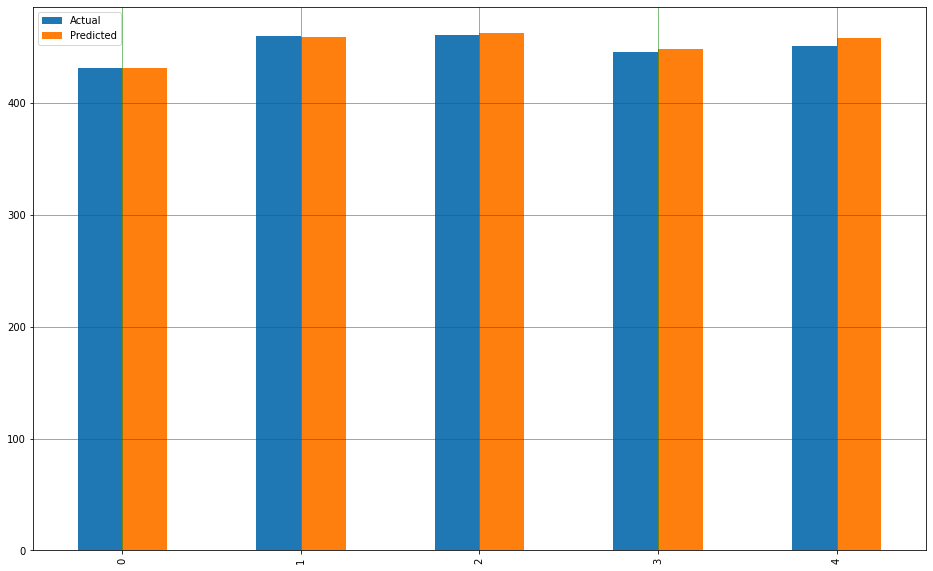

In [26]:
df1 = df.head(5)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()